In [147]:
# Import Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
bond_price = pd.read_csv("data/BondPrice.csv")

In [148]:
# Six Percent Loan of 1812 
# L1: 20048 
# Price history
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
# Drop columns with NaN 
clean_six_percent_prices = six_percent_prices.dropna(axis=1) 
print(clean_six_percent_prices)

    L1 ID   Series  1813-04-30  1813-05-31  1813-06-30  1813-07-31  \
50  20048  Average        93.0        92.0        93.0        91.0   

    1813-08-31  1813-09-30  1813-10-31  1813-11-30  ...  1824-12-31  \
50        91.0        90.0        91.0        91.0  ...      100.25   

    1825-01-31  1825-02-28  1825-03-31  1825-04-30  1825-05-31  1825-06-30  \
50      100.25      100.25      100.25      100.25      100.75       100.0   

    1825-07-31  1825-08-31  1825-09-30  
50      100.25      100.75       101.0  

[1 rows x 152 columns]


In [149]:
# Reformat dataframe 
six_percent_prices_melted = clean_six_percent_prices.melt(var_name='Timestamp', value_name='Price')
six_percent_prices_melted = six_percent_prices_melted.iloc[2:].reset_index(drop=True)
print(six_percent_prices_melted)

      Timestamp   Price
0    1813-04-30    93.0
1    1813-05-31    92.0
2    1813-06-30    93.0
3    1813-07-31    91.0
4    1813-08-31    91.0
..          ...     ...
145  1825-05-31  100.75
146  1825-06-30   100.0
147  1825-07-31  100.25
148  1825-08-31  100.75
149  1825-09-30   101.0

[150 rows x 2 columns]


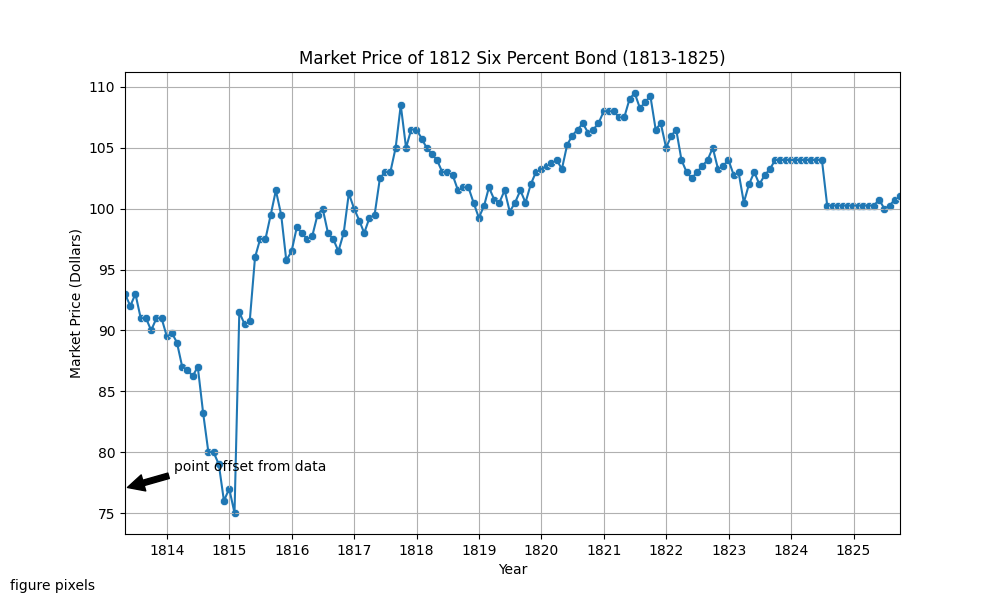

In [180]:
%matplotlib widget
# Graph dataframe 
six_percent_prices_melted['Timestamp'] = pd.to_datetime(six_percent_prices_melted['Timestamp'])

# Set up Seaborn plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])
#dots = ax.scatter(x, y, color='none')
scatplot = sns.scatterplot(data=six_percent_prices_melted, x='Timestamp', y='Price', marker='o')

# Format x-axis ticks to show year 
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_locator(MonthLocator(interval=4))

# Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
min_date = six_percent_prices_melted['Timestamp'].min()
max_date = six_percent_prices_melted['Timestamp'].max()

# Set the x-axis limits to exclude extra years
plt.xlim(min_date, max_date)

# Enhance plot aesthetics (optional)
plt.xlabel('Year')
plt.ylabel('Market Price (Dollars)')
plt.title('Market Price of 1812 Six Percent Bond (1813-1825)')
plt.grid(True)

# Add hovering features 
def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        scatplot, 
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="white",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )

    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )

    return cursor


def on_add(index):
    item = six_percent_prices_melted.iloc[index]
    parts = [
        f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
        f"Price: {item.Price:,.2f}",
    ]

    return "\n".join(parts)


show_hover_panel(on_add)

ax.annotate('figure pixels',
            xy=(10, 10), xycoords='figure pixels')

ax.annotate('point offset from data',
            xy=(pd.Timestamp("1813-04-30"), 77.04), xycoords='data',
            xytext=(90, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='center', verticalalignment='bottom')

plt.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])

plt.show()

#TODO
# Add some arrows pointing to some historical events 
# Add interactive elements - dragger 

(-2.0, 2.0)

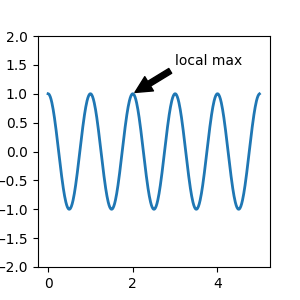

In [158]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(3, 3))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)


ax.set_ylim(-2, 2)